In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import power as pw
import math
from scipy.stats import fligner

In [13]:
min_nctf_csv = f"results/min_nctf/best_nctf_scores.csv"
max_nctf_csv = f"results/max_nctf/best_nctf_scores.csv"

In [14]:
min_nctf_array = pd.read_csv(min_nctf_csv).values.flatten()
max_nctf_array = pd.read_csv(max_nctf_csv).values.flatten()

In [16]:
min_mean = np.mean(min_nctf_array)
max_mean = np.mean(max_nctf_array)

min_std = min_nctf_array.std()
max_std = max_nctf_array.std()

min_variance = np.var(min_std)
max_variance = np.var(max_std)

print(f"Min mean: {min_mean}")
print(f"Max mean: {max_mean}")
print()
print(f"Min standard deviation: {min_std}")
print(f"Max standard deviation: {max_std}")
print()
print(f"Min sample variance: {min_variance}")
print(f"Max sample variance: {max_variance}")

Min mean: 1477.45197
Max mean: 1602.72399

Min standard deviation: 203.0294509994033
Max standard deviation: 203.4063759287793

Min sample variance: 0.0
Max sample variance: 0.0


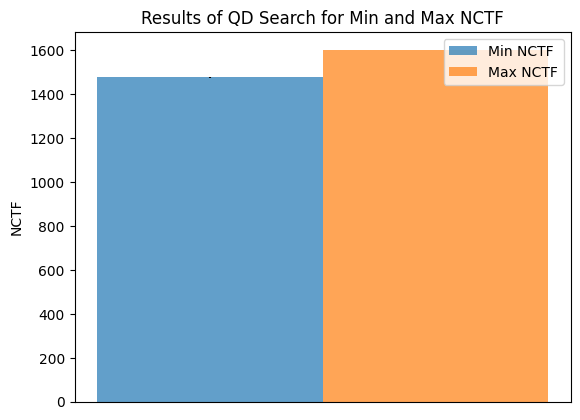

95% Confidence Intervals:
Min: 1.258387974522047
Max: 1.2607241764675756


In [42]:
confidence = 0.95

# Calculate the confidence interval for min_nctf_array
n = len(min_nctf_array)
std_err1 = np.std(min_nctf_array, ddof=1) / np.sqrt(n)  # Using sample standard deviation with ddof=1
ci_min = std_err1 * stats.t.ppf((1 + confidence) / 2, n - 1)

# Calculate the confidence interval for max_nctf_array
n = len(max_nctf_array)
std_err2 = np.std(max_nctf_array, ddof=1) / np.sqrt(n)  # Using sample standard deviation with ddof=1
ci_max = std_err2 * stats.t.ppf((1 + confidence) / 2, n - 1)

ind = np.arange(1)
width = 0.1

# Create a figure and axis
fig, ax = plt.subplots()

# Bar plots for Min and Max NCTF with error bars
ax.bar(ind, min_mean, width, yerr=ci_min, label='Min NCTF', alpha=0.7)
ax.bar(ind + width, max_mean, width, yerr=ci_max, label='Max NCTF', alpha=0.7)

# Set labels and title
ax.set_xlabel('')
ax.set_ylabel('NCTF')
ax.set_title('Results of QD Search for Min and Max NCTF')
ax.set_xticks([])

# Add legend
ax.legend()

# Display the plot
plt.show()

print("95% Confidence Intervals:")
print("Min:", ci_min)
print("Max:", ci_max)

# Hypothesis Test

In [53]:
stats.ttest_ind(min_nctf_array[0:100], max_nctf_array[0:100], equal_var = True,alternative='less')

TtestResult(statistic=-2.9086222290038117, pvalue=0.002022490499500761, df=198.0)

# Normality Analysis

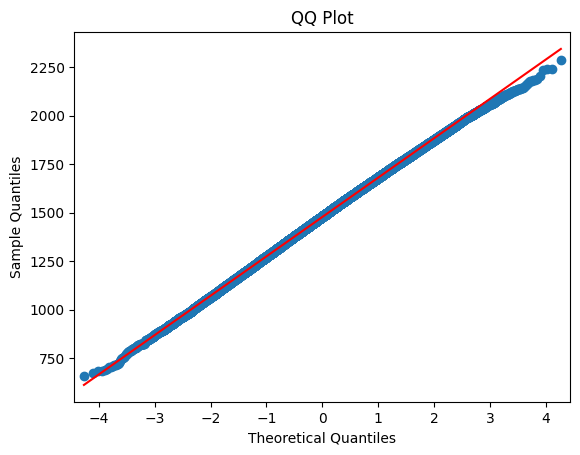

In [44]:
# Generate a random dataset
data = min_nctf_array

# Create the QQ plot
sm.qqplot(data, line='s')

# Set plot title and labels
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

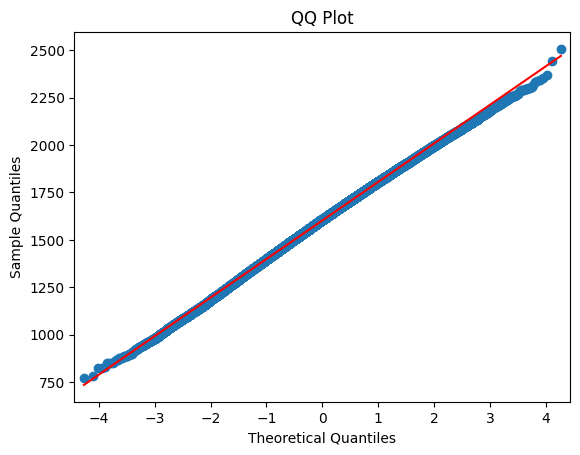

In [45]:
# Generate a random dataset
data = max_nctf_array

# Create the QQ plot
sm.qqplot(data, line='s')

# Set plot title and labels
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

# Equal Variance Analysis

In [46]:
fligner(min_nctf_array, max_nctf_array)

FlignerResult(statistic=0.02875783454769946, pvalue=0.8653393899886873)